# WeatherPy

Observation 1: Cities positioned within the Southern Hemisphere tend to have cooler temperatures than those at similar latitudes in the Northern Hemisphere. 

Observation 2: Latitude doesn't have an effect on wind speed or cloudiness. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [2]:
#Small list for testing purppses

# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=15)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=15)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

13

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['castro',
 'ponta do sol',
 'jinchang',
 'gwadar',
 'rikitea',
 'hithadhoo',
 'jamestown',
 'panorama',
 'busselton',
 'lasa',
 'carnarvon',
 'iqaluit',
 'taolanaro',
 'kapaa',
 'carauari',
 'hami',
 'mahebourg',
 'mar del plata',
 'tiksi',
 'nanortalik',
 'kawalu',
 'barao de melgaco',
 'vaini',
 'tsihombe',
 'alice springs',
 'sai buri',
 'barrow',
 'punta arenas',
 'hermanus',
 'antalaha',
 'lebu',
 'bluff',
 'bredasdorp',
 'puerto ayora',
 'ketchikan',
 'sakakah',
 'albany',
 'hobart',
 'dingle',
 'ushuaia',
 'isangel',
 'berlevag',
 'bengkalis',
 'palabuhanratu',
 'dossor',
 'borogontsy',
 'sitka',
 'brae',
 'vila franca do campo',
 'banda aceh',
 'mandalgovi',
 'lavrentiya',
 'alekseyevka',
 'dikson',
 'norman wells',
 'nawabganj',
 'belushya guba',
 'narsaq',
 'aksay',
 'east london',
 'amderma',
 'new norfolk',
 'colares',
 'kiyasovo',
 'arang',
 'upernavik',
 'cabo san lucas',
 'deputatskiy',
 'nishihara',
 'samarai',
 'husavik',
 'port elizabeth',
 'hamilton',
 'katsuura',
 

In [4]:
# Set the base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Set the units of measurement to 'imperial'
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
#Create lists to hold data
city_list = []
latitude =[]
longitude =[]
max_temp =[]
humidity = []
cloudiness =[]
wind_speed=[]
country =[]
date_list =[]

#Set the counters for loop
index_count = 0
set_count = 1

In [6]:
print(f"Beginning Data Retrieval")
print(f"---------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):

    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date_list.append(response["dt"])

        if index_count > 49:
            index_count = 1
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {set_count} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 : castro
Processing Record 2 of Set 1 : ponta do sol
Processing Record 3 of Set 1 : jinchang
Processing Record 4 of Set 1 : gwadar
Processing Record 5 of Set 1 : rikitea
Processing Record 6 of Set 1 : hithadhoo
Processing Record 7 of Set 1 : jamestown
Processing Record 8 of Set 1 : panorama
Processing Record 9 of Set 1 : busselton
Processing Record 10 of Set 1 : lasa
Processing Record 11 of Set 1 : carnarvon
Processing Record 12 of Set 1 : iqaluit
City not found. Skipping...
Processing Record 13 of Set 1 : kapaa
Processing Record 14 of Set 1 : carauari
Processing Record 15 of Set 1 : hami
Processing Record 16 of Set 1 : mahebourg
Processing Record 17 of Set 1 : mar del plata
Processing Record 18 of Set 1 : tiksi
Processing Record 19 of Set 1 : nanortalik
Processing Record 20 of Set 1 : kawalu
Processing Record 21 of Set 1 : barao de melgaco
Processing Record 22 of Set 1 : vaini
City not found. Skipping...

City not found. Skipping...
Processing Record 34 of Set 4 : alofi
Processing Record 35 of Set 4 : chino valley
Processing Record 36 of Set 4 : tual
Processing Record 37 of Set 4 : slave lake
Processing Record 38 of Set 4 : marshall
Processing Record 39 of Set 4 : sept-iles
Processing Record 40 of Set 4 : mogadishu
Processing Record 41 of Set 4 : quatre cocos
Processing Record 42 of Set 4 : aswan
Processing Record 43 of Set 4 : chamonix-mont-blanc
Processing Record 44 of Set 4 : jamame
Processing Record 45 of Set 4 : bilma
Processing Record 46 of Set 4 : talara
Processing Record 47 of Set 4 : faanui
Processing Record 48 of Set 4 : mwaya
Processing Record 49 of Set 4 : artigas
Processing Record 50 of Set 4 : sao domingos
Processing Record 1 of Set 5 : panama city
Processing Record 2 of Set 5 : bengkulu
Processing Record 3 of Set 5 : prince george
Processing Record 4 of Set 5 : beringovskiy
Processing Record 5 of Set 5 : los llanos de aridane
City not found. Skipping...
Processing Record 

Processing Record 24 of Set 8 : laguna
Processing Record 25 of Set 8 : port-gentil
Processing Record 26 of Set 8 : pekan
Processing Record 27 of Set 8 : vardo
Processing Record 28 of Set 8 : sechura
Processing Record 29 of Set 8 : lakes entrance
Processing Record 30 of Set 8 : praia
Processing Record 31 of Set 8 : joshimath
Processing Record 32 of Set 8 : verdun
Processing Record 33 of Set 8 : baruun-urt
Processing Record 34 of Set 8 : hailey
Processing Record 35 of Set 8 : saint-augustin
Processing Record 36 of Set 8 : portland
City not found. Skipping...
Processing Record 37 of Set 8 : kalabo
Processing Record 38 of Set 8 : khorixas
Processing Record 39 of Set 8 : palmaner
Processing Record 40 of Set 8 : vestmannaeyjar
Processing Record 41 of Set 8 : terrace bay
Processing Record 42 of Set 8 : isla mujeres
Processing Record 43 of Set 8 : stykkisholmur
City not found. Skipping...
Processing Record 44 of Set 8 : margate
Processing Record 45 of Set 8 : galveston
Processing Record 46 of 

Processing Record 16 of Set 12 : vostok
Processing Record 17 of Set 12 : mazyr
Processing Record 18 of Set 12 : santa maria
Processing Record 19 of Set 12 : zhengjiatun
Processing Record 20 of Set 12 : nisia floresta
Processing Record 21 of Set 12 : bumba
Processing Record 22 of Set 12 : sri aman
Processing Record 23 of Set 12 : kimbe
Processing Record 24 of Set 12 : ghanzi
-----------------------------
Data Retrieval Complete
-----------------------------


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a panda data frame using data retrieved
weather_pd = pd.DataFrame({ 
                "City" : city_list,
                "Latitude" : latitude,
                "Longitude" : longitude,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,            
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date_list
})

#Display dataframe
weather_pd

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,57.90,76,80,11.07,BR,1624457148
1,Ponta do Sol,32.6667,-17.1000,72.23,66,7,3.76,PT,1624457149
2,Jinchang,38.4953,102.1739,67.06,64,100,23.71,CN,1624457150
3,Gwadar,25.1216,62.3254,84.87,76,1,17.96,PK,1624457150
4,Rikitea,-23.1203,-134.9692,75.61,73,8,10.85,PF,1624457151
...,...,...,...,...,...,...,...,...,...
569,Nísia Floresta,-6.0911,-35.2086,85.01,50,6,15.99,BR,1624457498
570,Bumba,2.1833,22.4667,77.92,71,97,2.17,CD,1624457498
571,Sri Aman,1.2376,111.4621,74.23,98,100,1.14,MY,1624457499
572,Kimbe,-5.5502,150.1429,75.61,89,100,4.81,PG,1624457500


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [8]:
#Generate summary statistics
summary = weather_pd.describe()

#Display summary statistics
summary

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.932577,17.568890,70.630627,65.491289,54.540070,7.983310,1.624457e+09
std,33.181052,89.068453,14.859110,22.267431,39.911477,5.612572,1.151885e+02
min,-54.800000,-175.200000,33.420000,6.000000,0.000000,0.000000,1.624457e+09
25%,-6.843825,-59.300075,60.865000,53.000000,10.250000,3.440000,1.624457e+09
50%,29.114650,18.964000,71.240000,71.000000,63.000000,6.900000,1.624457e+09
75%,47.895200,96.319175,80.812500,83.000000,97.000000,11.852500,1.624457e+09
max,78.218600,179.316700,112.840000,100.000000,100.000000,31.070000,1.624458e+09


In [9]:
#Export data to csv
weather_pd.to_csv("weather_data.csv", index=False, header=True)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#Check if there are any outliers 
weather_pd_humidity = weather_pd[(weather_pd["Humidity"] > 100)].index                                 
weather_pd_humidity

Int64Index([], dtype='int64')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_pd.drop(weather_pd_humidity, inplace=False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,57.90,76,80,11.07,BR,1624457148
1,Ponta do Sol,32.6667,-17.1000,72.23,66,7,3.76,PT,1624457149
2,Jinchang,38.4953,102.1739,67.06,64,100,23.71,CN,1624457150
3,Gwadar,25.1216,62.3254,84.87,76,1,17.96,PK,1624457150
4,Rikitea,-23.1203,-134.9692,75.61,73,8,10.85,PF,1624457151


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

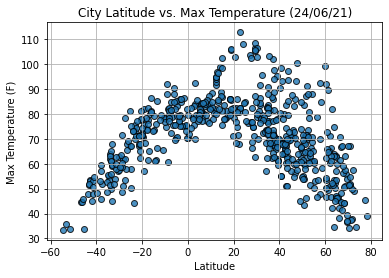

In [12]:
#Generate a scatter plot of latitude vs temperature 

#Set the x and y values
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Max Temp"]

#Generate scatter plot using Matplotlib
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

#Format scatterplot by adding a title
plt.title("City Latitude vs. Max Temperature (24/06/21)")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Format scatterplot by adding gridlines
plt.grid()

#Save scatter plot into the output_data folder
plt.savefig("../output_data/latitude vs temperature.png", bbox_inches="tight")

plt.show()

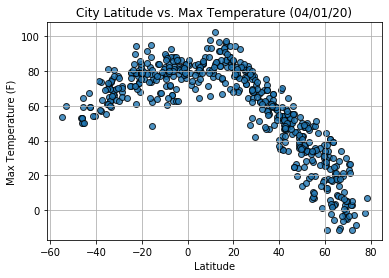

The above scatter plot shows the relationship between latitude and maximum temperature (F). Form the chart, it can be seen that cities which are positioned closer to latitude 0, i.e. the equator, exhibited a higher maximum temperature than cities positioned further away from the equator.

## Latitude vs. Humidity Plot

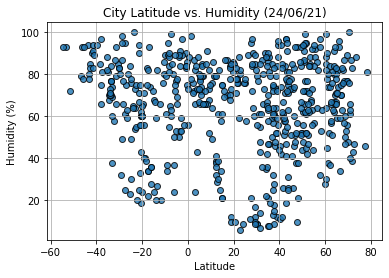

In [13]:
#Generate a scatter plot of latitude vs humidity 

#Set the x and y values
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Humidity"]

#Generate scatter plot using Matplotlib
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

#Format scatterplot by adding a title
plt.title("City Latitude vs. Humidity (24/06/21)")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Format scatterplot by adding gridlines
plt.grid()

#Save scatter plot into the output_data folder
plt.savefig("../output_data/latitude vs humidity.png", bbox_inches="tight")

plt.show()

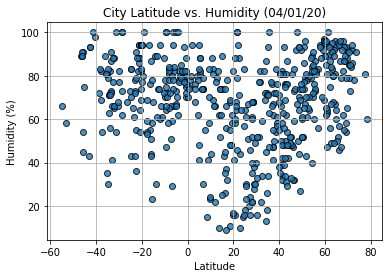

The above scatter plot shows the relationship between latitude and the humidity of a city. It can be seen that the data is evenly distributed throughout the plot. As such, there is no relationship between city position and humidity. 

## Latitude vs. Cloudiness Plot

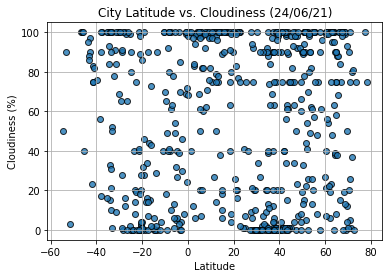

In [14]:
#Generate a scatter plot of latitude vs cloudiness

#Set the x and y values
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Cloudiness"]

#Generate scatter plot using Matplotlib
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

#Format scatterplot by adding a title
plt.title("City Latitude vs. Cloudiness (24/06/21)")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Format scatterplot by adding gridlines
plt.grid()

#Save scatter plot into the output_data folder
plt.savefig("../output_data/latitude vs cloudiness.png", bbox_inches="tight")

plt.show()

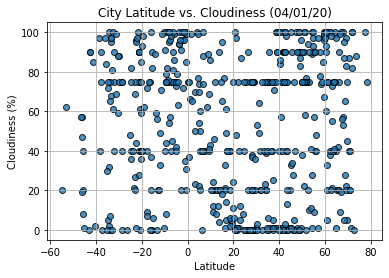

The above scatter plot shows the relationship between latitude and the cloudiness of a city. It can be seen that the data is evenly distributed throughout the plot. As such, there is no relationship between city position and cloudiness. 

## Latitude vs. Wind Speed Plot

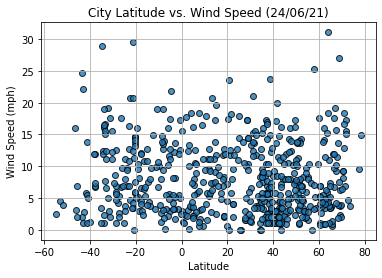

In [15]:
#Generate a scatter plot of latitude vs wind speed

#Set the x and y values
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Wind Speed"]

#Generate scatter plot using Matplotlib
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

#Format scatterplot by adding a title
plt.title("City Latitude vs. Wind Speed (24/06/21)")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Format scatterplot by adding gridlines
plt.grid()

#Save scatter plot into the output_data folder
plt.savefig("../output_data/latitude vs wind speed.png", bbox_inches="tight")

plt.show()

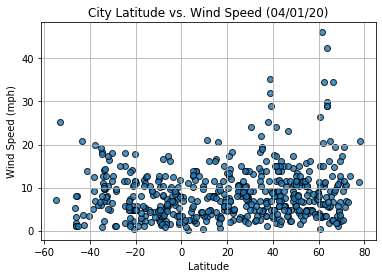

The above scatter plot shows the relationship between latitude and the wind speed of a city. It can be seen that the data is evenly distributed throughout the plot. As such, there is no relationship between city position and wind speed. 

## Linear Regression

In [16]:
# Create Northern Hemisphere DataFrame
northern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
# Create Southern Hemisphere DataFrame
southern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] < 0]

In [17]:
# Create a function for calculating the correlation coefficient, linear regression model and scatter plot - this way, the code does not have to be written out again and again
def regression_scatter(x,y):
    
    #Calculate Pearson's Correlation Coefficient
    correlation = st.pearsonr(x,y)
    
    #Display the correlation coefficient
    print(f"The correlation coefficient is {round(correlation[0],2)}")
    
    # Add the linear regression equation and line to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    #Calculate the linear regression
    regression = x * slope + intercept
    
    #Create the line equation
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Generate scatterplot using Matplotlib
    plt.scatter(x, y)
    
    #Plot the line
    plt.plot(x,regression,"r-")
    
    #Display the r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    #Give the line equation
    return line

# Create a function for annotating the scatter plot
def annotate(line, a, b):
    plt.annotate(line,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.65
The r-squared is: 0.42366731551105813


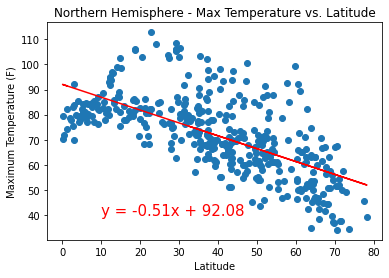

In [18]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, 10, 40)

#Format scatterplot by adding a title
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude.png")

The r-value is: 0.46937863826630627


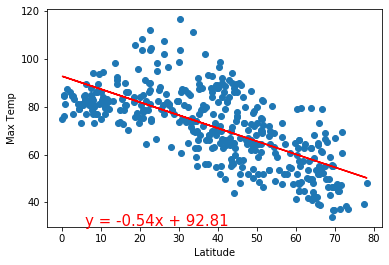

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.84
The r-squared is: 0.7043598407127769


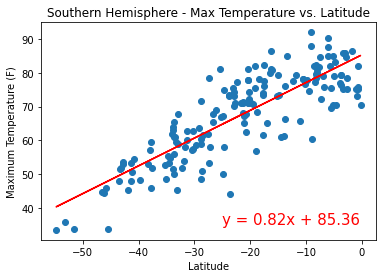

In [19]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(southern_hemisphere["Latitude"], southern_hemisphere["Max Temp"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, -25,35)

#Format scatterplot by adding a title
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude.png")

The r-value is: 0.6082708688906918


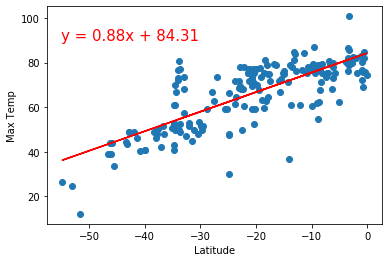

### Max Temp vs. Latitude Analysis

There exists moderate negative correlation between maximum temperature and latitude for the Northern Hemisphere. However, there is a strong positive correlation between maximum temperature and latitude for the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.05
The r-squared is: 0.002583868486252192


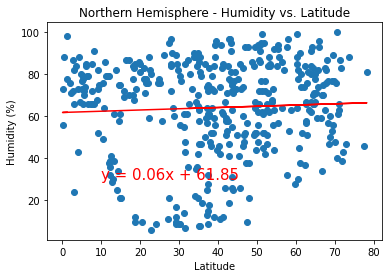

In [20]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, 10, 30)

#Format scatterplot by adding a title
plt.title("Northern Hemisphere - Humidity vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity vs. Latitude.png")

The r-value is: 0.000543987878808455


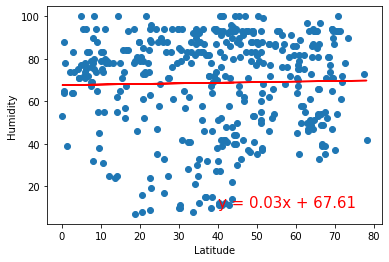

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is -0.2
The r-squared is: 0.038526883239068395


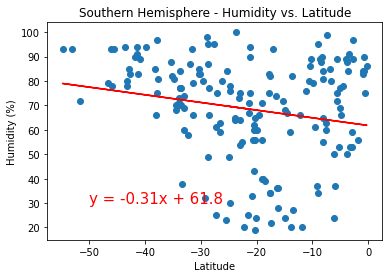

In [21]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, -50, 30)

#Format scatterplot by adding a title
plt.title("Southern Hemisphere - Humidity vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity vs. Latitude.png")

The r-value is: 0.014985174297345524


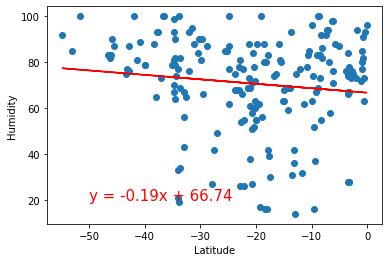

### Humidity (%) vs. Latitude Analysis

There exists an extremely weak positive correlation between humidity and latitude for the Northern Hemisphere. Furthermore, there is a very weak negative correlation between humidity and latitude for the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is -0.04
The r-squared is: 0.001488679462337858


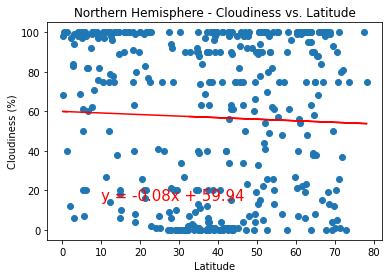

In [22]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, 10, 15)

#Format scatterplot by adding a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness vs. Latitude.png")

The r-value is: 0.0020898727664228514


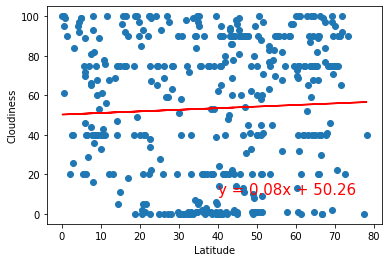

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is -0.24
The r-squared is: 0.055393057455049896


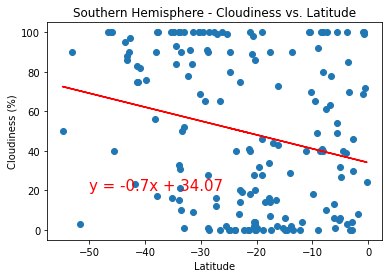

In [23]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, -50, 20)

#Format scatterplot by adding a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness vs. Latitude.png")

The r-value is: 0.0035263772085582894


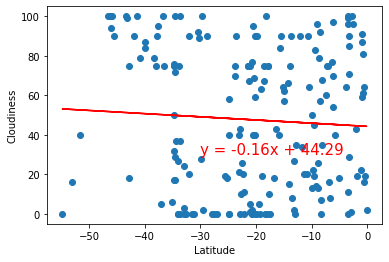

### Cloudiness (%) vs. Latitude Analysis

There exists an extremely weak negative correlation between cloudiness and latitude for the Northern Hemisphere. Similarly, there is a very weak negative correlation between cloudiness and latitude for the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.0
The r-squared is: 1.5199240602324234e-05


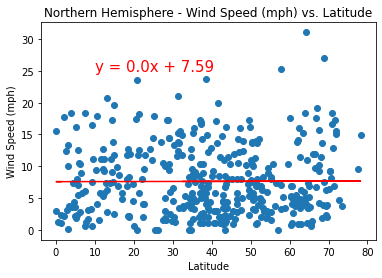

In [24]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, 10, 25)

#Format scatterplot by adding a title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude.png")

The r-value is: 0.04019723576144484


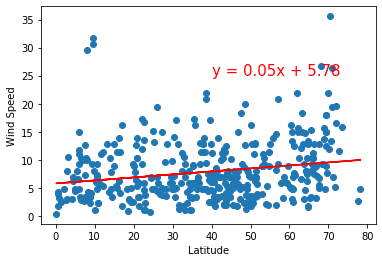

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.01
The r-squared is: 4.070742391136099e-05


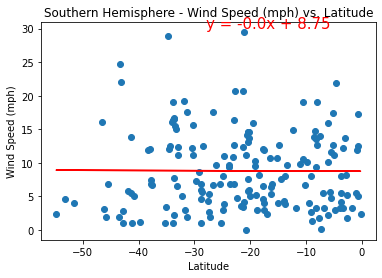

In [25]:
# Use the regression_scatter function to perform the analysis
analysis = regression_scatter(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])

#Use the annotate function to plot the line and the equation on the scatter plot
annotate(analysis, -28, 30)

#Format scatterplot by adding a title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

#Format scatterplot by adding axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude.png")

The r-value is: 0.017128274759839232


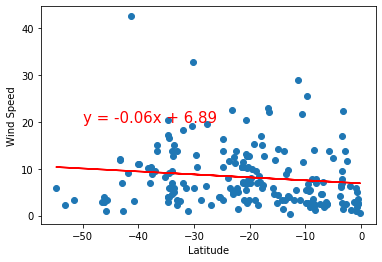

### Wind Speed (mph) vs. Latitude Analysis


There doesn't exist a correlation between wind speed and latitude for either the Northern Hemisphere nor the Southern Hemisphere.